# Анализ вакансий сайта онлайн-рекрутинга по запросу Аналитик данных без опыта

## Содержание
[1.Цель проекта](#1)

[2.Изучение и предобработка данных из файла](#2)

[3.Первоначальные выводы](#3)

[4.vacancy - название вакансии](#4)

[5.employer - название работодателя](#5)

[6.salary - заработная плата](#6)

[7.experience - опыт](#7)

[8.remote - возможность удаленной работы](#8)

[9.place - месторасположение вакансии](#9)

[10.Работодатели по заработной плате](#10)

### Цель проекта <a id='1'></a>
Выявить ситуацию на рынке труда по данным представленных на сайте вакансий по запросу Аналитик данных без опыта.

**Описание:**  
План исследования:
* Импорт данных
* Предобработка на пропуски, дубликаты, ошибки * Очистка и подготовка данных
* Визуализация данных


В распоряжении имеется таблица данных со следющими полями:e
* web-scraper-order - служебная информация парсера
* web-scraper-start-url - служебная информация парсера
* pager-next - служебная информация парсера
* pager-next-href -служебная информация парсера
* vacancy - название вакансии
* employer - название работодателя
* salary - заработная плата
* salary_experience - заработная плата или опыт
* experience - опыт
* remote - возможность удаленной работы
* place - месторасположение вакансии
* link - название ссылки
* link-href - ссылка на вакансиюеуппе A/B-теста


### Изучение и предобработка данных из файла <a id='2'></a>

In [1]:
# импорт библиотеки pandas
import pandas as pd
import re
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from pymystem3 import Mystem
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns

In [2]:
# чтение файлов с данными и сохранение
df_data_analyst_hh = pd.read_excel(r'C:\Users\ANDREI\Downloads\data_analyst_hh_2.xlsx')

In [3]:
# получение первых строк таблицы
df_data_analyst_hh.head(5)

,web-scraper-order,web-scraper-start-url,vacancy,employer,salary,experience,remote,place,link,link-href
0,1722595267-1,https://hh.ru/search/vacancy?text=%D0%90%D0%BD...,Менеджер проектов в сфере медиааналитики,Яндекс Крауд: Контент,от 65 000 ₽ на руки,Без опыта,Можно удалённо,Москва,Менеджер проектов в сфере медиааналитики,https://hh.ru/vacancy/103683405?query=%D0%90%D...
1,1722595267-2,https://hh.ru/search/vacancy?text=%D0%90%D0%BD...,Менеджер проектов в сфере медиааналитики,Яндекс Крауд: Контент,от 65 000 ₽ на руки,Без опыта,Можно удалённо,Санкт-Петербург,Менеджер проектов в сфере медиааналитики,https://hh.ru/vacancy/103683406?query=%D0%90%D...
2,1722595267-3,https://hh.ru/search/vacancy?text=%D0%90%D0%BD...,Менеджер проектов в сфере медиааналитики,Яндекс Крауд: Контент,от 65 000 ₽ на руки,Без опыта,Можно удалённо,Новосибирск,Менеджер проектов в сфере медиааналитики,https://hh.ru/vacancy/103683407?query=%D0%90%D...
3,1722595267-4,https://hh.ru/search/vacancy?text=%D0%90%D0%BD...,Менеджер проектов в сфере медиааналитики,Яндекс Крауд: Контент,от 65 000 ₽ на руки,Без опыта,Можно удалённо,Нижний Новгород,Менеджер проектов в сфере медиааналитики,https://hh.ru/vacancy/103683410?query=%D0%90%D...
4,1722595267-5,https://hh.ru/search/vacancy?text=%D0%90%D0%BD...,Менеджер проектов в сфере медиааналитики,Яндекс Крауд: Контент,от 65 000 ₽ на руки,Без опыта,Можно удалённо,Краснодар,Менеджер проектов в сфере медиааналитики,https://hh.ru/vacancy/103683419?query=%D0%90%D...


Оставим только необходимые столбцы

In [4]:
# Указываем список столбцов, которые хотим удалить
columns_to_drop = ['web-scraper-order', 'web-scraper-start-url', 'link']
# Удаляем указанные столбцы из DataFrame
df = df_data_analyst_hh.drop(columns=columns_to_drop, axis=1)

Обрежем ссылки для лаконичности

In [5]:
# Функция для обрезки ссылки
def truncate_link(link):
    return link.split('?')[0]
# Применяем функцию к столбцу 'link-href'
df['link-href'] = df['link-href'].apply(truncate_link)

Приведем все строковые значения в нижний регистр

In [6]:
# Приводим все строковые значения в DataFrame к нижнему регистру
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df

,vacancy,employer,salary,experience,remote,place,link-href
0,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,москва,https://hh.ru/vacancy/103683405
1,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,санкт-петербург,https://hh.ru/vacancy/103683406
2,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,новосибирск,https://hh.ru/vacancy/103683407
3,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,нижний новгород,https://hh.ru/vacancy/103683410
4,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,краснодар,https://hh.ru/vacancy/103683419
...,...,...,...,...,...,...,...
1637,продуктовый аналитик (remote),startribe ltd,NaN,без опыта,можно удалённо,москва,https://hh.ru/vacancy/104234975
1638,аналитик в департамент мониторинга,ооо алмаз,90 000 – 110 000 ₽ на руки,без опыта,NaN,москва,https://hh.ru/vacancy/104205230
1639,аналитик,ооо континент,до 46 000 ₽ до вычета налогов,без опыта,можно удалённо,красноярск,https://hh.ru/vacancy/104828090
1640,аналитик по обращаемости,билайн,NaN,без опыта,NaN,нижний новгород,https://hh.ru/vacancy/104014458


## Первоначальные выводы <a id='3'></a>

In [7]:
# создадим фукцию для вывода общей инфрмации по таблице целиком
def tab_info(df_x, name):
# получение cводной информации по параметрам данных
    print('Сводная информация по параметрам данных', name)
    display(df_x.describe().round(2))
# подсчет количества отсутствующих значений
    print('Количество отсутствующих значений', name)
    display(df_x.isna().sum())
# подсчет доли отсутствующих значений с округлением
    print('Доли отсутствующих значений с округлением', name)
    display(round(df_x.isna().sum() * 100 / len(df_x), 2))
# подсчет количества задублированных записей
    print('Задублированных записей', name)
    display(df_x.duplicated().sum())    
# получение общей информации о данных в таблице
    print('Общая информация о данных в таблице', name)
    display(df_x.info())

In [8]:
# получение первых строк таблицы
df.head(5)

,vacancy,employer,salary,experience,remote,place,link-href
0,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,москва,https://hh.ru/vacancy/103683405
1,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,санкт-петербург,https://hh.ru/vacancy/103683406
2,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,новосибирск,https://hh.ru/vacancy/103683407
3,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,нижний новгород,https://hh.ru/vacancy/103683410
4,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,краснодар,https://hh.ru/vacancy/103683419


In [9]:
# вывод общей инфрмации по таблице целиком
tab_info(df, 'Список вакансий')

Сводная информация по параметрам данных Список вакансий


,vacancy,employer,salary,experience,remote,place,link-href
count,1642,1640,1005,1642,296,1642,1642
unique,1096,913,377,1,1,150,1604
top,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,москва,https://hh.ru/vacancy/103294458
freq,61,61,69,1642,296,613,2


Количество отсутствующих значений Список вакансий


vacancy          0
employer         2
salary         637
experience       0
remote        1346
place            0
link-href        0
dtype: int64

Доли отсутствующих значений с округлением Список вакансий


vacancy        0.00
employer       0.12
salary        38.79
experience     0.00
remote        81.97
place          0.00
link-href      0.00
dtype: float64

Задублированных записей Список вакансий


37

Общая информация о данных в таблице Список вакансий
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vacancy     1642 non-null   object
 1   employer    1640 non-null   object
 2   salary      1005 non-null   object
 3   experience  1642 non-null   object
 4   remote      296 non-null    object
 5   place       1642 non-null   object
 6   link-href   1642 non-null   object
dtypes: object(7)
memory usage: 89.9+ KB


None

In [10]:
# Общее количество строк
total_rows = df.shape[0]

# Заполненность строк
filled_rows = df.notnull().sum()
filled_percentage = (filled_rows / total_rows) * 100

# Уникальные значения
unique_counts = df.nunique()
unique_percentage = (unique_counts / total_rows) * 100

# Форматированный вывод
output = []

output.append("📊 **Общее описание DataFrame** 📊")
output.append(f"🔍 Количество строк: **{total_rows}**")

output.append("\n🔎 Заполненность по столбцам:")
for column in df.columns:
    output.append(f"- **{column}**: {filled_rows[column]} заполненных, {filled_percentage[column]:.2f}%")

output.append("\n🌈 Уникальные значения по столбцам:")
for column in df.columns:
    output.append(f"- **{column}**: {unique_counts[column]} уникальных значений, {unique_percentage[column]:.2f}%")

# Преобразуем список в строку
description = "\n".join(output)

# Выводим описание
print(description)

📊 **Общее описание DataFrame** 📊
🔍 Количество строк: **1642**

🔎 Заполненность по столбцам:
- **vacancy**: 1642 заполненных, 100.00%
- **employer**: 1640 заполненных, 99.88%
- **salary**: 1005 заполненных, 61.21%
- **experience**: 1642 заполненных, 100.00%
- **remote**: 296 заполненных, 18.03%
- **place**: 1642 заполненных, 100.00%
- **link-href**: 1642 заполненных, 100.00%

🌈 Уникальные значения по столбцам:
- **vacancy**: 1096 уникальных значений, 66.75%
- **employer**: 913 уникальных значений, 55.60%
- **salary**: 377 уникальных значений, 22.96%
- **experience**: 1 уникальных значений, 0.06%
- **remote**: 1 уникальных значений, 0.06%
- **place**: 150 уникальных значений, 9.14%
- **link-href**: 1604 уникальных значений, 97.69%


In [11]:
# Общее количество строк
total_rows = df.shape[0]

# Заполненность строк
filled_rows = df.notnull().sum()
filled_percentage = (filled_rows / total_rows) * 100

# Уникальные значения
unique_counts = df.nunique()
unique_percentage = (unique_counts / total_rows) * 100

# Форматированный вывод в слитом виде
output = f"В датасете {total_rows} строк. "
for column in df.columns:
    output += (f"В столбце «{column}» {filled_rows[column]} заполненных значений "
               f"({filled_percentage[column]:.2f}% от общего числа) и {unique_counts[column]} уникальных значений "
               f"({unique_percentage[column]:.2f}%). ")

# Выводим описание
print(output)

В датасете 1642 строк. В столбце «vacancy» 1642 заполненных значений (100.00% от общего числа) и 1096 уникальных значений (66.75%). В столбце «employer» 1640 заполненных значений (99.88% от общего числа) и 913 уникальных значений (55.60%). В столбце «salary» 1005 заполненных значений (61.21% от общего числа) и 377 уникальных значений (22.96%). В столбце «experience» 1642 заполненных значений (100.00% от общего числа) и 1 уникальных значений (0.06%). В столбце «remote» 296 заполненных значений (18.03% от общего числа) и 1 уникальных значений (0.06%). В столбце «place» 1642 заполненных значений (100.00% от общего числа) и 150 уникальных значений (9.14%). В столбце «link-href» 1642 заполненных значений (100.00% от общего числа) и 1604 уникальных значений (97.69%). 


Если есть задублированные строки, посмотрим их

In [12]:
# Выявление дубликатов
duplicates = df[df.duplicated(keep=False)]  # keep=False показывает все дубликаты

# Проверка, есть ли дубликаты
if not duplicates.empty:
    print("Найдены дубликаты:")
    display(duplicates)
else:
    print("Дубликатов не найдено.")

Найдены дубликаты:


,vacancy,employer,salary,experience,remote,place,link-href
93,специалист клиентского сервиса,пао ростелеком,40 000 – 40 000 ₽ на руки,без опыта,NaN,томск,https://hh.ru/vacancy/93640702
96,смм-менеджер/smm manager,ооо цимус,20 000 – 100 000 ₽ до вычета налогов,без опыта,можно удалённо,москва,https://hh.ru/vacancy/103564585
97,менеджер по работе с маркетплейсами,ип голота галина николаевна,35 000 – 70 000 ₽ на руки,без опыта,NaN,ярославль,https://hh.ru/vacancy/103983585
99,главный специалист по разработке цифровых двой...,газпром нефть,NaN,без опыта,NaN,омск,https://hh.ru/vacancy/103502705
101,менеджер по персоналу,ооо компания хома,NaN,без опыта,NaN,москва,https://hh.ru/vacancy/91518132
...,...,...,...,...,...,...,...
619,инженер скс,интерсвязь,от 50 000 ₽ на руки,без опыта,NaN,челябинск,https://hh.ru/vacancy/100598367
626,бизнес-ассистент (стажер),рекруто,15 000 – 30 000 ₽ до вычета налогов,без опыта,NaN,санкт-петербург,https://hh.ru/vacancy/103424220
629,специалист отдела по работе с территориальными...,россети урал,50 000 – 65 000 ₽ на руки,без опыта,NaN,екатеринбург,https://hh.ru/vacancy/103356084
630,"менеджер по продажам (ул.в.н.мачуги, 41)",этажи юг,от 170 000 ₽ до вычета налогов,без опыта,NaN,краснодар,https://hh.ru/vacancy/103504114


Удалим их

In [13]:
# Удаляем дублированные строки, оставляя оригиналы
df = df.drop_duplicates().reset_index(drop=True)

В данных есть строки с пропущенными значениями в названии работодателя, посмотрим их

In [14]:
# Просмотр строк с пропущенными значениями в столбце 'employer'
missing_employer_rows = df[df['employer'].isnull()]
missing_employer_rows

,vacancy,employer,salary,experience,remote,place,link-href
358,финансовый аналитик,NaN,NaN,без опыта,NaN,москва,https://hh.ru/vacancy/104061602
1182,junior it специалист / системный аналитик / пр...,NaN,100 000 – 170 000 ₽ на руки,без опыта,можно удалённо,санкт-петербург,https://hh.ru/vacancy/104711992


Незначительное количество, удалим их

In [15]:
# Удаление строк с пропущенными значениями в столбце 'employer'
df = df.dropna(subset=['employer']).reset_index(drop=True)

In [16]:
df

,vacancy,employer,salary,experience,remote,place,link-href
0,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,москва,https://hh.ru/vacancy/103683405
1,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,санкт-петербург,https://hh.ru/vacancy/103683406
2,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,новосибирск,https://hh.ru/vacancy/103683407
3,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,нижний новгород,https://hh.ru/vacancy/103683410
4,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,без опыта,можно удалённо,краснодар,https://hh.ru/vacancy/103683419
...,...,...,...,...,...,...,...
1598,продуктовый аналитик (remote),startribe ltd,NaN,без опыта,можно удалённо,москва,https://hh.ru/vacancy/104234975
1599,аналитик в департамент мониторинга,ооо алмаз,90 000 – 110 000 ₽ на руки,без опыта,NaN,москва,https://hh.ru/vacancy/104205230
1600,аналитик,ооо континент,до 46 000 ₽ до вычета налогов,без опыта,можно удалённо,красноярск,https://hh.ru/vacancy/104828090
1601,аналитик по обращаемости,билайн,NaN,без опыта,NaN,нижний новгород,https://hh.ru/vacancy/104014458


In [17]:
# вывод количества строк дубликатов по link-href
df.duplicated(subset=['link-href'], keep=False).sum()

2

In [18]:
duplicates = df[df.duplicated(subset=['link-href'], keep=False)]
duplicates

,vacancy,employer,salary,experience,remote,place,link-href
1551,"стажер ростелеком по треку ""методолог/аналитик""",futuretoday,NaN,без опыта,NaN,ярославль,https://adsrv.hh.ru/click
1552,"стажер ростелеком по треку ""методолог/аналитик""",futuretoday,NaN,без опыта,NaN,орел,https://adsrv.hh.ru/click


Дубли образовались из-за обрезки рекламной ссылки, оставим как есть

В данных есть строки неявные дубли: это полностью одинаковые вакансии, разница только в городах найма, посмотрим сколько их.

In [19]:
# вывод количества строк дубликатов без place и link-href
df.duplicated(subset=['vacancy', 'employer', 'salary', 'experience', 'remote'], keep=False).sum()

322

In [20]:
# Выделим не явные дубли в отдельный датасет
duplicated_df = df[df.duplicated(subset=['vacancy', 'employer', 'salary', 'experience', 'remote'], keep=False)]
#duplicated_df.sort_values(by='employer')

Визуализируем количество задублированных вакансий.

Общее количество строк: 1603
Количество задублированных строк: 322
Количество уникальных строк: 1281


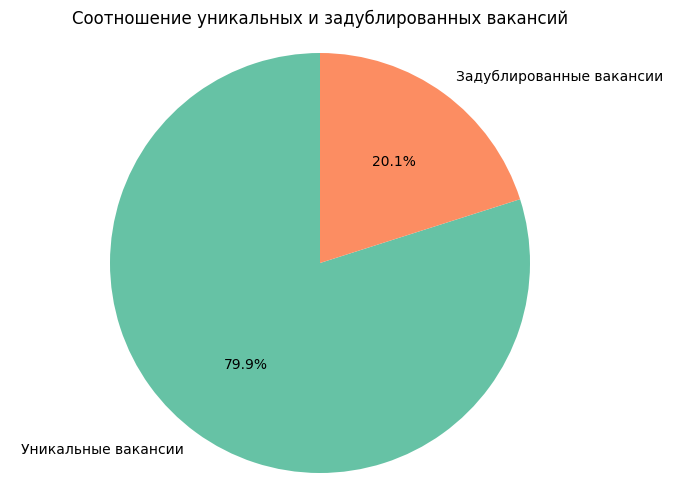

In [21]:
# Определяем общее количество строк и количество дубликатов
total_rows = len(df)
duplicate_rows = df.duplicated(subset=['vacancy', 'employer', 'salary', 'experience', 'remote'], keep=False).sum()

# Соотношение дубликатов к общему числу строк
unique_rows = total_rows - duplicate_rows

# Выводим результаты
print(f"Общее количество строк: {total_rows}")
print(f"Количество задублированных строк: {duplicate_rows}")
print(f"Количество уникальных строк: {unique_rows}")

# Данные для круговой диаграммы
labels = ['Уникальные вакансии', 'Задублированные вакансии']
sizes = [unique_rows, duplicate_rows]
colors = ['#66c2a5', '#fc8d62']

# Создаем круговую диаграмму
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Соотношение уникальных и задублированных вакансий')
plt.axis('equal')  # Чтобы круг был кругом
plt.show()

Посмотрим топ работодателей с задублированными вакансиями

Количество уникальных значений в столбце 'employer': 63


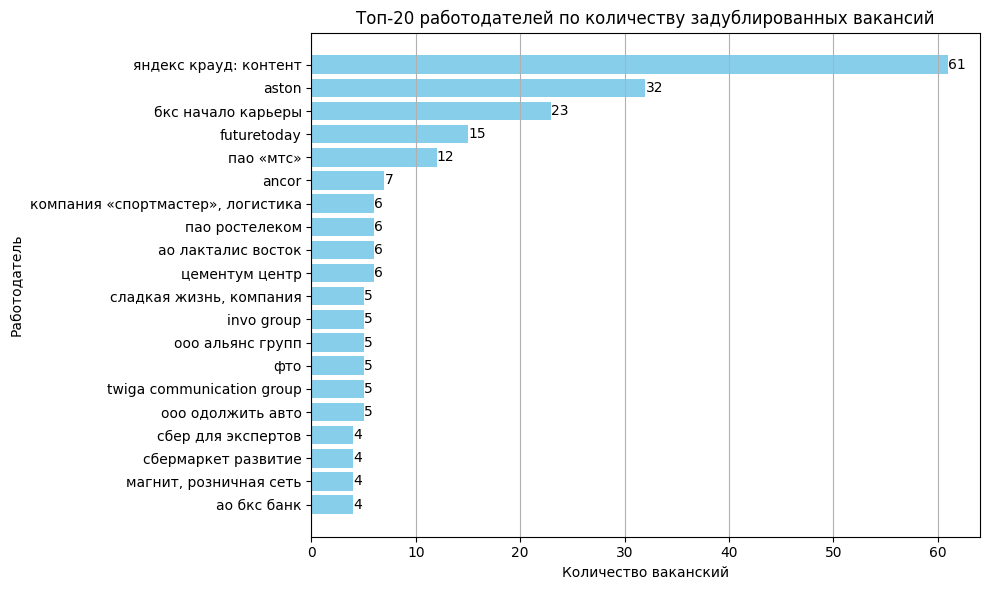

In [22]:
# Вывод количества уникальных значений в столбце 'employer'
unique_employers_count = duplicated_df['employer'].nunique()
print(f"Количество уникальных значений в столбце 'employer': {unique_employers_count}")

# Подсчет количества значений в колонке 'employer' и выбор топ-10, сортировка по убыванию
top_employers = duplicated_df['employer'].value_counts().nlargest(20)

# Построение горизонтальной гистограммы
plt.figure(figsize=(10, 6))
bars = plt.barh(top_employers.index[::-1], top_employers.values[::-1], color='skyblue')  # Горизонтальная гистограмма

# Добавление подписей значений
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', va='center')

# Добавление заголовка и подписей осей
plt.title('Топ-20 работодателей по количеству задублированных вакансий')
plt.xlabel('Количество ваканский')
plt.ylabel('Работодатель')
plt.grid(axis='x')  # Сетка по оси X

# Показать график
plt.tight_layout()
plt.show()

Удалим не явно задублированные вакансии

In [23]:
# Удаление неявных дубликатов по указанным столбцам
columns_to_check = ['vacancy', 'employer', 'salary', 'experience', 'remote']
df = df.drop_duplicates(subset=columns_to_check).reset_index(drop=True)

In [24]:
df.duplicated(subset=['vacancy', 'employer', 'salary', 'experience', 'remote'], keep=False).sum()

0

In [25]:
# вывод общей инфрмации по таблице целиком
tab_info(df, 'Список вакансий')

Сводная информация по параметрам данных Список вакансий


,vacancy,employer,salary,experience,remote,place,link-href
count,1373,1373,830,1373,167,1373,1373
unique,1095,913,376,1,1,129,1373
top,аналитик,бкс начало карьеры,от 50 000 ₽ на руки,без опыта,можно удалённо,москва,https://hh.ru/vacancy/103683405
freq,42,34,42,1373,167,579,1


Количество отсутствующих значений Список вакансий


vacancy          0
employer         0
salary         543
experience       0
remote        1206
place            0
link-href        0
dtype: int64

Доли отсутствующих значений с округлением Список вакансий


vacancy        0.00
employer       0.00
salary        39.55
experience     0.00
remote        87.84
place          0.00
link-href      0.00
dtype: float64

Задублированных записей Список вакансий


0

Общая информация о данных в таблице Список вакансий
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vacancy     1373 non-null   object
 1   employer    1373 non-null   object
 2   salary      830 non-null    object
 3   experience  1373 non-null   object
 4   remote      167 non-null    object
 5   place       1373 non-null   object
 6   link-href   1373 non-null   object
dtypes: object(7)
memory usage: 75.2+ KB


None

In [26]:
# Общее количество строк
total_rows = df.shape[0]

# Заполненность строк
filled_rows = df.notnull().sum()
filled_percentage = (filled_rows / total_rows) * 100

# Уникальные значения
unique_counts = df.nunique()
unique_percentage = (unique_counts / total_rows) * 100

# Форматированный вывод
output = []

output.append("📊 **Общее описание DataFrame** 📊")
output.append(f"🔍 Количество строк: **{total_rows}**")

output.append("\n🔎 Заполненность по столбцам:")
for column in df.columns:
    output.append(f"- **{column}**: {filled_rows[column]} заполненных, {filled_percentage[column]:.2f}%")

output.append("\n🌈 Уникальные значения по столбцам:")
for column in df.columns:
    output.append(f"- **{column}**: {unique_counts[column]} уникальных значений, {unique_percentage[column]:.2f}%")

# Преобразуем список в строку
description = "\n".join(output)

# Выводим описание
print(description)

📊 **Общее описание DataFrame** 📊
🔍 Количество строк: **1373**

🔎 Заполненность по столбцам:
- **vacancy**: 1373 заполненных, 100.00%
- **employer**: 1373 заполненных, 100.00%
- **salary**: 830 заполненных, 60.45%
- **experience**: 1373 заполненных, 100.00%
- **remote**: 167 заполненных, 12.16%
- **place**: 1373 заполненных, 100.00%
- **link-href**: 1373 заполненных, 100.00%

🌈 Уникальные значения по столбцам:
- **vacancy**: 1095 уникальных значений, 79.75%
- **employer**: 913 уникальных значений, 66.50%
- **salary**: 376 уникальных значений, 27.39%
- **experience**: 1 уникальных значений, 0.07%
- **remote**: 1 уникальных значений, 0.07%
- **place**: 129 уникальных значений, 9.40%
- **link-href**: 1373 уникальных значений, 100.00%


### vacancy - название вакансии <a id='4'></a>

Проанализируем столбец отдельно

In [27]:
df_vacancy = pd.DataFrame(df[['link-href', 'vacancy']])
df_vacancy

,link-href,vacancy
0,https://hh.ru/vacancy/103683405,менеджер проектов в сфере медиааналитики
1,https://hh.ru/vacancy/103488853,специалист/координатор по поддержке бизнеса
2,https://hh.ru/vacancy/103385131,начинающий специалист в it / аналитик битрикс24
3,https://hh.ru/vacancy/101367077,аналитик/рекрутер/ресечер
4,https://hh.ru/vacancy/103209729,торговый представитель
...,...,...
1368,https://hh.ru/vacancy/104234975,продуктовый аналитик (remote)
1369,https://hh.ru/vacancy/104205230,аналитик в департамент мониторинга
1370,https://hh.ru/vacancy/104828090,аналитик
1371,https://hh.ru/vacancy/104014458,аналитик по обращаемости


In [28]:
# Подсчет уникальных значений в столбце 'column_name'
unique_count = df_vacancy['vacancy'].nunique()

# Вывод результата
print(f'Количество уникальных записей в столбце "vacancy": {unique_count}')

Количество уникальных записей в столбце "vacancy": 1095


In [29]:
# Функция для очистки текста
def clean_text(text):
    # Заменяем знаки пунктуации и цифры на пробелы
    text = re.sub(r'[^\w\s]', ' ', text)  # Заменить знаки пунктуации на пробел
    text = re.sub(r'\d+', ' ', text)      # Заменить цифры на пробел
    text = re.sub(r'\s+', ' ', text)      # Заменить несколько пробелов на один
    text = text.strip()                   # Удалить пробелы в начале и конце
    return text

# Применяем функцию очистки ко всем значениям в столбце vacancy
df_vacancy['vacancy'] = df_vacancy['vacancy'].apply(clean_text)

# Выводим очищенный датафрейм
#df_vacancy

In [30]:
# Объединяем все текстовые значения из столбца в одну переменную
vacancy_combined = ' '.join(df_vacancy['vacancy'].astype(str))
#vacancy_combined

In [31]:
def count_words_and_unique_properties(text):
    # Разделяем текст на слова
    words = text.split()
    
    # Подсчитываем общее количество слов
    total_words = len(words)
    
    # Создаем множество для уникальных свойств
    unique_properties = set(words)
    
    # Подсчитываем количество уникальных свойств
    total_unique_properties = len(unique_properties)
    
    return total_words, total_unique_properties

total_words, total_unique_properties = count_words_and_unique_properties(vacancy_combined)

print(f"Количество слов: {total_words}")
print(f"Количество уникальных свойств: {total_unique_properties}")

Количество слов: 5500
Количество уникальных свойств: 1096


In [32]:
# создадим функцию для лемматизации
def lemmatize_text(text): 
    mystem = Mystem() 
    lemmas = mystem.lemmatize(text)
    lemmatized_text = ''.join(lemmas)
    return lemmatized_text
# выполним лемматизацию
lemmatized_vacancy = lemmatize_text(vacancy_combined)
#lemmatized_vacancy

In [33]:
# создадим функцию для удаления стоп слов
def remove_stopwords(text):
    stop_words = set(stopwords.words('russian'))  # Выберите язык для набора стоп-слов
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text
# выполним удаление стоп слов
vacancy_without_stopwords = remove_stopwords(lemmatized_vacancy)
#vacancy_without_stopwords

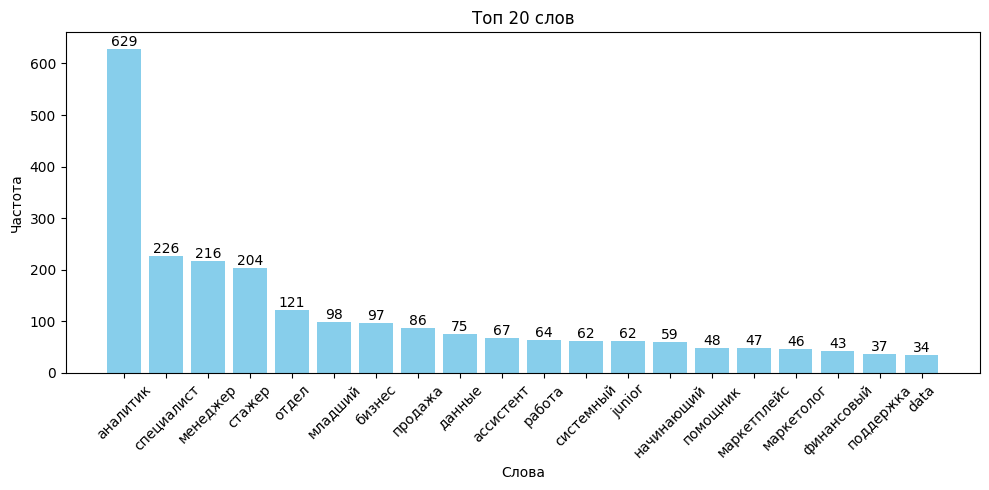

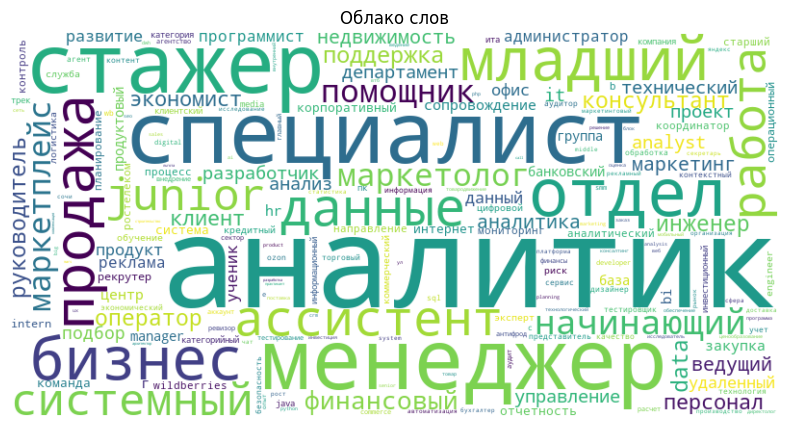

In [34]:
# Разбиваем текст на слова и подсчитываем частоты
words = vacancy_without_stopwords.split()
word_counts = Counter(words)

# Получаем 20 самых распространенных слов
top_words = word_counts.most_common(20)

# Подготовка данных для графика
words, counts = zip(*top_words)

# Создание графика
plt.figure(figsize=(10, 5))
bars = plt.bar(words, counts, color='skyblue')
plt.title('Топ 20 слов')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.xticks(rotation=45)

# Добавление подписей значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Отключаем оси
plt.title('Облако слов')
plt.show()

### employer - название работодателя <a id='5'></a>

Проанализируем столбец отдельно

In [35]:
df_employer = pd.DataFrame(df[['link-href', 'employer']])
df_employer

,link-href,employer
0,https://hh.ru/vacancy/103683405,яндекс крауд: контент
1,https://hh.ru/vacancy/103488853,ао лакталис восток
2,https://hh.ru/vacancy/103385131,invo group
3,https://hh.ru/vacancy/101367077,ancor
4,https://hh.ru/vacancy/103209729,пао «мтс»
...,...,...
1368,https://hh.ru/vacancy/104234975,startribe ltd
1369,https://hh.ru/vacancy/104205230,ооо алмаз
1370,https://hh.ru/vacancy/104828090,ооо континент
1371,https://hh.ru/vacancy/104014458,билайн


In [36]:
# Подсчет уникальных значений в столбце 'column_name'
unique_count = df_employer['employer'].nunique()

# Вывод результата
print(f'Количество уникальных записей в столбце "employer": {unique_count}')

Количество уникальных записей в столбце "employer": 913


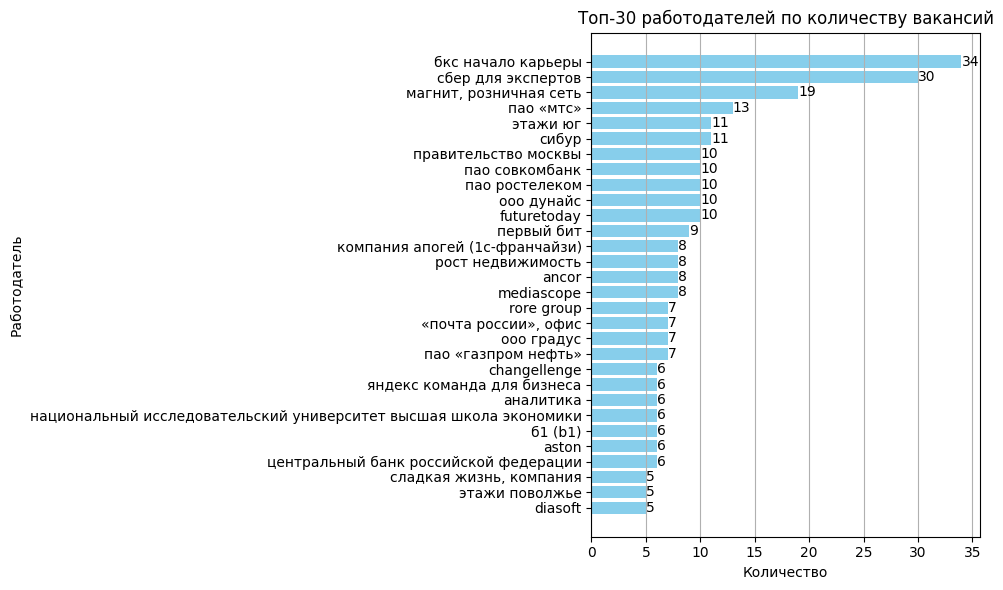

In [37]:
# Подсчет количества значений в колонке 'employer' и выбор топ-10, сортировка по убыванию
top_employers = df_employer['employer'].value_counts().nlargest(30)

# Построение горизонтальной гистограммы
plt.figure(figsize=(10, 6))
bars = plt.barh(top_employers.index[::-1], top_employers.values[::-1], color='skyblue')  # Горизонтальная гистограмма

# Добавление подписей значений
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', va='center')

# Добавление заголовка и подписей осей
plt.title('Топ-30 работодателей по количеству вакансий')
plt.xlabel('Количество')
plt.ylabel('Работодатель')
plt.grid(axis='x')  # Сетка по оси X

# Показать график
plt.tight_layout()
plt.show()

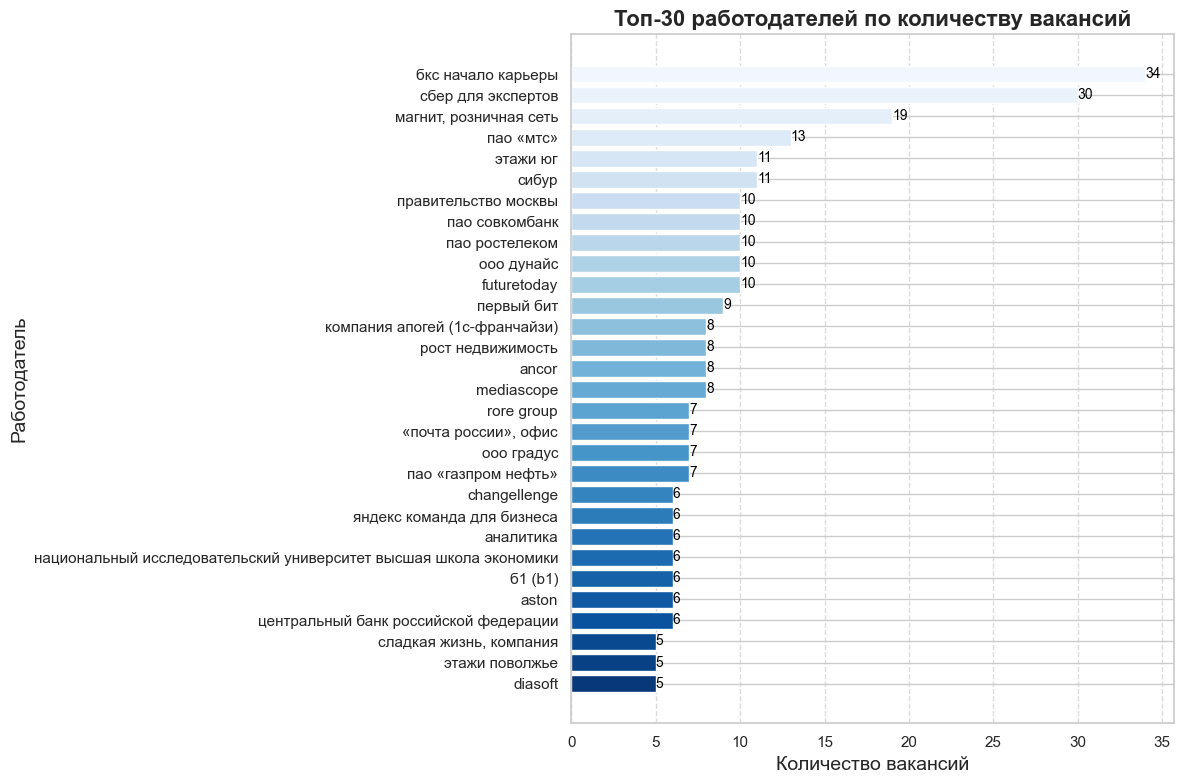

In [38]:
# Подсчет количества значений в колонке 'employer' и выбор топ-30, сортировка по убыванию
top_employers = df_employer['employer'].value_counts().nlargest(30)

# Настройка стиля графика с помощью Seaborn
sns.set(style='whitegrid')

# Построение горизонтальной гистограммы
plt.figure(figsize=(12, 8))
bars = plt.barh(top_employers.index[::-1], top_employers.values[::-1], color=sns.color_palette("Blues_r", len(top_employers)))

# Добавление подписей значений
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', va='center', ha='left', color='black', fontsize=10)

# Добавление заголовка и подписей осей с настройками шрифта
plt.title('Топ-30 работодателей по количеству вакансий', fontsize=16, fontweight='bold')
plt.xlabel('Количество вакансий', fontsize=14)
plt.ylabel('Работодатель', fontsize=14)

# Добавление сетки
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Настройка отступов
plt.tight_layout()

# Показать график
plt.show()

### salary - заработная плата <a id='6'></a>

Проанализируем столбец отдельно

In [39]:
df_salary = pd.DataFrame(df[['link-href', 'salary']])

In [40]:
df_salary

,link-href,salary
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки
1,https://hh.ru/vacancy/103488853,NaN
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов
3,https://hh.ru/vacancy/101367077,NaN
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов
...,...,...
1368,https://hh.ru/vacancy/104234975,NaN
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов
1371,https://hh.ru/vacancy/104014458,NaN


In [41]:
# Подсчет уникальных значений в столбце 'column_name'
unique_count = df_salary['salary'].nunique()

# Вывод результата
print(f'Количество уникальных записей в столбце "salary": {unique_count}')

Количество уникальных записей в столбце "salary": 376


In [42]:
# Разбиваем значения в столбце 'salary' по пробелам и создаем новые столбцы
salary_split = df_salary['salary'].str.split(expand=True)

# Объединяем исходный DataFrame с новыми столбцами
result_df = pd.concat([df_salary, salary_split], axis=1)

# Определяем максимальное количество частей
max_parts = salary_split.shape[1]

# Переименовываем новые столбцы с учетом максимального количества
result_df.columns = ['link-href', 'salary'] + [f'salary_part_{i + 1}' for i in range(max_parts)]

# Если есть недостающие столбцы, добавляем их
for i in range(1, max_parts + 1):
    if f'salary_part_{i}' not in result_df.columns:
        result_df[f'salary_part_{i}'] = None  # или 0, в зависимости от логики

# Выводим результат
result_df

,link-href,salary,salary_part_1,salary_part_2,salary_part_3,salary_part_4,salary_part_5,salary_part_6,salary_part_7,salary_part_8,salary_part_9
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,от,65,000,₽,на,руки,None,None,None
1,https://hh.ru/vacancy/103488853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,30,000,–,90,000,₽,до,вычета,налогов
3,https://hh.ru/vacancy/101367077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,от,84,000,₽,до,вычета,налогов,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,90,000,–,110,000,₽,на,руки,None
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,до,46,000,₽,до,вычета,налогов,None,None
1371,https://hh.ru/vacancy/104014458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Проходим по всем столбцам, начиная с третьего
for column in result_df.columns[2:]:
    # Извлекаем уникальные нецифровые значения, исключая None и NaN
    unique_values = result_df[column][result_df[column].notna() & ~result_df[column].astype(str).str.isdigit()].unique()
    print(f"Уникальные нецифровые значения в столбце '{column}': {unique_values}")

Уникальные нецифровые значения в столбце 'salary_part_1': ['от' 'до']
Уникальные нецифровые значения в столбце 'salary_part_2': ['–']
Уникальные нецифровые значения в столбце 'salary_part_3': ['–']
Уникальные нецифровые значения в столбце 'salary_part_4': ['₽' '$']
Уникальные нецифровые значения в столбце 'salary_part_5': ['на' 'до' '$']
Уникальные нецифровые значения в столбце 'salary_part_6': ['руки' '₽' 'вычета' 'до']
Уникальные нецифровые значения в столбце 'salary_part_7': ['до' 'налогов' 'на' 'вычета']
Уникальные нецифровые значения в столбце 'salary_part_8': ['вычета' 'руки' 'налогов']
Уникальные нецифровые значения в столбце 'salary_part_9': ['налогов']


In [44]:
# Проходим по каждому столбцу, начиная с 3-го (индекс 2)
for col in result_df.columns[2:]:
    # Получаем уникальные значения, которые являются цифрами
    unique_digits = result_df[col][result_df[col].astype(str).str.isdigit()].unique()
    
    # Преобразуем в числовой формат для поиска минимума и максимума
    if unique_digits.size > 0:  # Проверяем, есть ли уникальные цифры
        numeric_values = unique_digits.astype(int)
        min_value = numeric_values.min()
        max_value = numeric_values.max()
        print(f'Столбец \"{col}\": Минимальное значение = {min_value}, Максимальное значение = {max_value}')

Столбец "salary_part_1": Минимальное значение = 10, Максимальное значение = 800
Столбец "salary_part_2": Минимальное значение = 0, Максимальное значение = 800
Столбец "salary_part_3": Минимальное значение = 0, Максимальное значение = 900
Столбец "salary_part_4": Минимальное значение = 10, Максимальное значение = 400
Столбец "salary_part_5": Минимальное значение = 0, Максимальное значение = 900


In [45]:
# Проверяем, есть ли '$' в любом из столбцов и создаем новый датафрейм
filtered_df = result_df[result_df.isin(['$']).any(axis=1)]

# Удаляем строки с '$' из исходного датафрейма
#result_df = result_df[~result_df.isin(['$']).any(axis=1)]

# Сбрасываем индексы в обоих датафреймах
filtered_df = filtered_df.reset_index(drop=True)
#result_df = result_df#.reset_index(drop=True)

# Выводим результаты
filtered_df

,link-href,salary,salary_part_1,salary_part_2,salary_part_3,salary_part_4,salary_part_5,salary_part_6,salary_part_7,salary_part_8,salary_part_9
0,https://hh.ru/vacancy/104547898,800 – 1 200 $ до вычета налогов,800,–,1,200,$,до,вычета,налогов,None
1,https://hh.ru/vacancy/103234309,400 – 400 $ на руки,400,–,400,$,на,руки,None,None,None


In [46]:
# Функция для извлечения минимального и максимального значений
def extract_min_max(salary_str):
    # Заменяем неразрывные пробелы на обычные
    salary_str = salary_str.replace(u'\u202F', ' ')
    # Находим все числа в строке, включая числа с пробелами
    numbers = re.findall(r'\d+(?:\s*\d+)*', salary_str)  # Находим числа, которые могут иметь пробелы
    # Конвертируем в целые числа
    numbers = [int(num.replace(' ', '')) for num in numbers]  # Убираем пробелы и конвертируем
    return min(numbers), max(numbers)

# Применяем функцию к столбцу 'salary'
filtered_df['min'], filtered_df['max'] = zip(*filtered_df['salary'].apply(extract_min_max))
# Вывод результата
filtered_df = filtered_df[['link-href', 'salary', 'min', 'max']]

filtered_df

,link-href,salary,min,max
0,https://hh.ru/vacancy/104547898,800 – 1 200 $ до вычета налогов,800,1200
1,https://hh.ru/vacancy/103234309,400 – 400 $ на руки,400,400


In [47]:
# Функция для обработки двух соседних столбцов
def process_columns(col1, col2):
    combined = []
    for val1, val2 in zip(col1, col2):
        # Преобразуем значения в строки и проверяем на наличие цифр
        str_val1 = str(val1) if pd.notna(val1) else ''
        str_val2 = str(val2) if pd.notna(val2) else ''
        
        if str_val1.isdigit() and str_val2.isdigit():
            combined.append(str_val1 + str_val2)  # Склеиваем значения
        else:
            combined.append(None)  # Или можно оставить значение как есть
    return combined

# Список для хранения новых комбинированных столбцов
new_columns = []
for i in range(len(result_df.columns) - 1):
    col1 = result_df.iloc[:, i]
    col2 = result_df.iloc[:, i + 1]
    new_col = process_columns(col1, col2)
    new_columns.append(new_col)

# Создание нового DataFrame с комбинированными столбцами
df_combined = pd.DataFrame(new_columns).T  # Транспонируем, чтобы столбцы стали строками
df_combined.columns = [f'Combined_{i}' for i in range(len(new_columns))]  # Переименовываем столбцы

# Добавляем два первых столбца из result_df в df_combined
df_combined = pd.concat([result_df.iloc[:, :2].reset_index(drop=True), df_combined], axis=1)

# Вывод результата
df_combined

,link-href,salary,Combined_0,Combined_1,Combined_2,Combined_3,Combined_4,Combined_5,Combined_6,Combined_7,Combined_8,Combined_9
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,None,None,None,65000,None,None,None,None,None,None
1,https://hh.ru/vacancy/103488853,NaN,None,None,None,None,None,None,None,None,None,None
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,None,None,30000,None,None,90000,None,None,None,None
3,https://hh.ru/vacancy/101367077,NaN,None,None,None,None,None,None,None,None,None,None
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,None,None,None,84000,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,None,None,None,None,None,None,None,None,None,None
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,None,None,90000,None,None,110000,None,None,None,None
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,None,None,None,46000,None,None,None,None,None,None
1371,https://hh.ru/vacancy/104014458,NaN,None,None,None,None,None,None,None,None,None,None


In [48]:
# Функция для извлечения чисел из строки и нахождения минимального и максимального значений
def find_min_max(row):
    numbers = [int(num) for num in row if isinstance(num, str) and num.isdigit()]
    return pd.Series({'min': min(numbers) if numbers else None, 'max': max(numbers) if numbers else None})

# Применяем функцию ко всем строкам df_combined
min_max_df = df_combined.apply(find_min_max, axis=1)

# Оставляем только два столбца: min и max
df_min_max = min_max_df[['min', 'max']]

# Объединяем с двумя первыми столбцами из df_combined
df_combined_all = pd.concat([df_combined.iloc[:, :2].reset_index(drop=True), df_min_max], axis=1)

# Преобразуем столбцы в тип int
#df_combined_all['min'] = df_combined_all['min'].astype('Int64')  # Используем Int64 для поддержки NA
#df_combined_all['max'] = df_combined_all['max'].astype('Int64')

# Вывод результата
df_combined_all

,link-href,salary,min,max
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,65000.0,65000.0
1,https://hh.ru/vacancy/103488853,NaN,NaN,NaN
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,30000.0,90000.0
3,https://hh.ru/vacancy/101367077,NaN,NaN,NaN
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,84000.0,84000.0
...,...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,NaN,NaN
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,90000.0,110000.0
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,46000.0,46000.0
1371,https://hh.ru/vacancy/104014458,NaN,NaN,NaN


In [49]:
# Присоединение таблиц по столбцам 'link-href' и 'salary'
merged_df = pd.merge(df_combined_all, filtered_df, on=['link-href', 'salary'], suffixes=('_orig', '_filtered'), how='left')

# Замена значений в столбцах 'min' и 'max' из filtered_df
merged_df['min'] = merged_df['min_filtered'].combine_first(merged_df['min_orig'])
merged_df['max'] = merged_df['max_filtered'].combine_first(merged_df['max_orig'])

# Удаление временных столбцов
merged_df.drop(columns=['min_orig', 'max_orig', 'min_filtered', 'max_filtered'], inplace=True)

# Вывод результата
df_combined_all = merged_df
df_combined_all

,link-href,salary,min,max
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,65000.0,65000.0
1,https://hh.ru/vacancy/103488853,NaN,NaN,NaN
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,30000.0,90000.0
3,https://hh.ru/vacancy/101367077,NaN,NaN,NaN
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,84000.0,84000.0
...,...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,NaN,NaN
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,90000.0,110000.0
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,46000.0,46000.0
1371,https://hh.ru/vacancy/104014458,NaN,NaN,NaN


In [50]:
## Убедимся, что result_df имеет как минимум 3 столбца
#if result_df.shape[1] >= 3:
#    # Добавляем третий столбец result_df к df_combined_all
#    df_combined_all['salary_part'] = result_df.iloc[:, 2]  # Обращаемся к третьему столбцу по индексу 2
#else:
#    print("result_df не содержит достаточного количества столбцов.")
#
## Выводим результирующий DataFrame
#df_combined_all

In [51]:
# Объединяем датафреймы по столбцам 'link-href' и 'salary'
temp_df = pd.merge(df_combined_all, result_df, on=['link-href', 'salary'], how='left')

# Выбираем только нужные столбцы
temp_df = temp_df[['link-href', 'salary', 'min', 'max', 'salary_part_1']]

# Переименовываем датафрейм в df_salary
df_combined_all = temp_df

# Выводим результат
df_combined_all

,link-href,salary,min,max,salary_part_1
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,65000.0,65000.0,от
1,https://hh.ru/vacancy/103488853,NaN,NaN,NaN,NaN
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,30000.0,90000.0,30
3,https://hh.ru/vacancy/101367077,NaN,NaN,NaN,NaN
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,84000.0,84000.0,от
...,...,...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,NaN,NaN,NaN
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,90000.0,110000.0,90
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,46000.0,46000.0,до
1371,https://hh.ru/vacancy/104014458,NaN,NaN,NaN,NaN


In [52]:
# Функция для корректировки значений min и max
def adjust_salaries(row):
    if row['salary_part_1'] == 'от':
        row['max'] = None  # Удаляем значение в max
    elif row['salary_part_1'] == 'до':
        row['min'] = None  # Удаляем значение в min
    return row

# Применяем функцию к каждой строке DataFrame
df_combined_all = df_combined_all.apply(adjust_salaries, axis=1)

# Вывод результата
df_combined_all

,link-href,salary,min,max,salary_part_1
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,65000.0,NaN,от
1,https://hh.ru/vacancy/103488853,NaN,NaN,NaN,NaN
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,30000.0,90000.0,30
3,https://hh.ru/vacancy/101367077,NaN,NaN,NaN,NaN
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,84000.0,NaN,от
...,...,...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,NaN,NaN,NaN
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,90000.0,110000.0,90
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,NaN,46000.0,до
1371,https://hh.ru/vacancy/104014458,NaN,NaN,NaN,NaN


In [53]:
# Объединяем датафреймы по столбцам 'link-href' и 'salary'
temp_df = pd.merge(df_salary, df_combined_all, on=['link-href', 'salary'], how='left')

# Выбираем только нужные столбцы
temp_df = temp_df[['link-href', 'salary', 'min', 'max']]

# Переименовываем датафрейм в df_salary
df_salary = temp_df

# Выводим результат
df_salary

,link-href,salary,min,max
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,65000.0,NaN
1,https://hh.ru/vacancy/103488853,NaN,NaN,NaN
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,30000.0,90000.0
3,https://hh.ru/vacancy/101367077,NaN,NaN,NaN
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,84000.0,NaN
...,...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,NaN,NaN
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,90000.0,110000.0
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,NaN,46000.0
1371,https://hh.ru/vacancy/104014458,NaN,NaN,NaN


In [54]:
# Создаем новую таблицу, сохраняя первые два столбца
new_df = result_df.iloc[:, :2].copy()

# Добавляем новый столбец для хранения найденных значений
new_df['currency'] = None

# Проверяем все значения в result_df
for index in range(len(result_df)):
    found_currency = []
    for column in range(len(result_df.columns)):
        value = result_df.iat[index, column]  # Обращаемся по индексу
        if isinstance(value, str) and ('₽' in value or '$' in value):
            # Если нашли '₽' или '$', добавляем его в список
            found_currency.append('₽' if '₽' in value else '$')

    # Если нашли валюту, помещаем в новый столбец
    if found_currency:
        new_df.at[index, 'currency'] = ', '.join(set(found_currency))  # Убираем дублирующиеся валюты

# Теперь new_df будет содержать первые два столбца и новый столбец 'Currency'
new_df

,link-href,salary,currency
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,₽
1,https://hh.ru/vacancy/103488853,NaN,None
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,₽
3,https://hh.ru/vacancy/101367077,NaN,None
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,₽
...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,None
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,₽
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,₽
1371,https://hh.ru/vacancy/104014458,NaN,None


In [55]:
# Объединяем датафреймы по столбцам 'link-href' и 'salary'
temp_df = pd.merge(df_salary, new_df, on=['link-href', 'salary'], how='left')

# Переименовываем датафрейм в df_salary
df_salary = temp_df

# Выводим результат
df_salary

,link-href,salary,min,max,currency
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,65000.0,NaN,₽
1,https://hh.ru/vacancy/103488853,NaN,NaN,NaN,None
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,30000.0,90000.0,₽
3,https://hh.ru/vacancy/101367077,NaN,NaN,NaN,None
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,84000.0,NaN,₽
...,...,...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,NaN,NaN,None
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,90000.0,110000.0,₽
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,NaN,46000.0,₽
1371,https://hh.ru/vacancy/104014458,NaN,NaN,NaN,None


In [56]:
# Создаем новый DataFrame с сохранением первых двух столбцов
new_df = result_df.iloc[:, :2].copy()

# Ищем совпадения и склеиваем их
new_column = []

for index, row in result_df.iterrows():
    combined_value = ""
    for i in range(len(row) - 1):
        # Проверка для двух соседних
        if row.iloc[i] == 'на' and row.iloc[i + 1] == 'руки':
            combined_value = 'на руки'
            break
        # Проверка для трех соседних
        if (i < len(row) - 2 and 
            row.iloc[i] == 'до' and 
            row.iloc[i + 1] == 'вычета' and 
            row.iloc[i + 2] == 'налогов'):
            combined_value = 'до вычета налогов'
            break
    if combined_value:
        new_column.append(combined_value)
    else:
        new_column.append(None)

# Добавляем новый столбец в новый DataFrame
new_df['taxes'] = new_column

# Вывод результата
new_df

,link-href,salary,taxes
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,на руки
1,https://hh.ru/vacancy/103488853,NaN,None
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,до вычета налогов
3,https://hh.ru/vacancy/101367077,NaN,None
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,до вычета налогов
...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,None
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,на руки
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,до вычета налогов
1371,https://hh.ru/vacancy/104014458,NaN,None


In [57]:
# Объединяем датафреймы по столбцам 'link-href' и 'salary'
temp_df = pd.merge(df_salary, new_df, on=['link-href', 'salary'], how='left')

# Переименовываем датафрейм в df_salary
df_salary = temp_df

# Выводим результат
df_salary

,link-href,salary,min,max,currency,taxes
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,65000.0,NaN,₽,на руки
1,https://hh.ru/vacancy/103488853,NaN,NaN,NaN,None,None
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,30000.0,90000.0,₽,до вычета налогов
3,https://hh.ru/vacancy/101367077,NaN,NaN,NaN,None,None
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,84000.0,NaN,₽,до вычета налогов
...,...,...,...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,NaN,NaN,None,None
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,90000.0,110000.0,₽,на руки
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,NaN,46000.0,₽,до вычета налогов
1371,https://hh.ru/vacancy/104014458,NaN,NaN,NaN,None,None


In [58]:
# Задаем курс доллара
usd_to_rub = 90  # Пример значения курса

# Проверка на валюту и преобразование
df_salary.loc[df_salary['currency'] == '$', ['min', 'max']] *= usd_to_rub
df_salary['currency'] = df_salary['currency'].replace('$', '₽')

# Проверка на налоги и вычет 13%
df_salary.loc[df_salary['taxes'] == 'до вычета налогов', ['min', 'max']] *= (1 - 0.13)
df_salary['taxes'] = df_salary['taxes'].replace('до вычета налогов', 'на руки')

# Округление значений в столбцах min и max
df_salary['min'] = df_salary['min'].round(0)
df_salary['max'] = df_salary['max'].round(0)

# Выводим результат
df_salary

,link-href,salary,min,max,currency,taxes
0,https://hh.ru/vacancy/103683405,от 65 000 ₽ на руки,65000.0,NaN,₽,на руки
1,https://hh.ru/vacancy/103488853,NaN,NaN,NaN,None,None
2,https://hh.ru/vacancy/103385131,30 000 – 90 000 ₽ до вычета налогов,26100.0,78300.0,₽,на руки
3,https://hh.ru/vacancy/101367077,NaN,NaN,NaN,None,None
4,https://hh.ru/vacancy/103209729,от 84 000 ₽ до вычета налогов,73080.0,NaN,₽,на руки
...,...,...,...,...,...,...
1368,https://hh.ru/vacancy/104234975,NaN,NaN,NaN,None,None
1369,https://hh.ru/vacancy/104205230,90 000 – 110 000 ₽ на руки,90000.0,110000.0,₽,на руки
1370,https://hh.ru/vacancy/104828090,до 46 000 ₽ до вычета налогов,NaN,40020.0,₽,на руки
1371,https://hh.ru/vacancy/104014458,NaN,NaN,NaN,None,None


In [59]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   link-href  1373 non-null   object 
 1   salary     830 non-null    object 
 2   min        746 non-null    float64
 3   max        452 non-null    float64
 4   currency   830 non-null    object 
 5   taxes      830 non-null    object 
dtypes: float64(2), object(4)
memory usage: 64.5+ KB


Вывели данные о зарплате в нормализованном виде: в столбцах max и min значения в рублях на руки

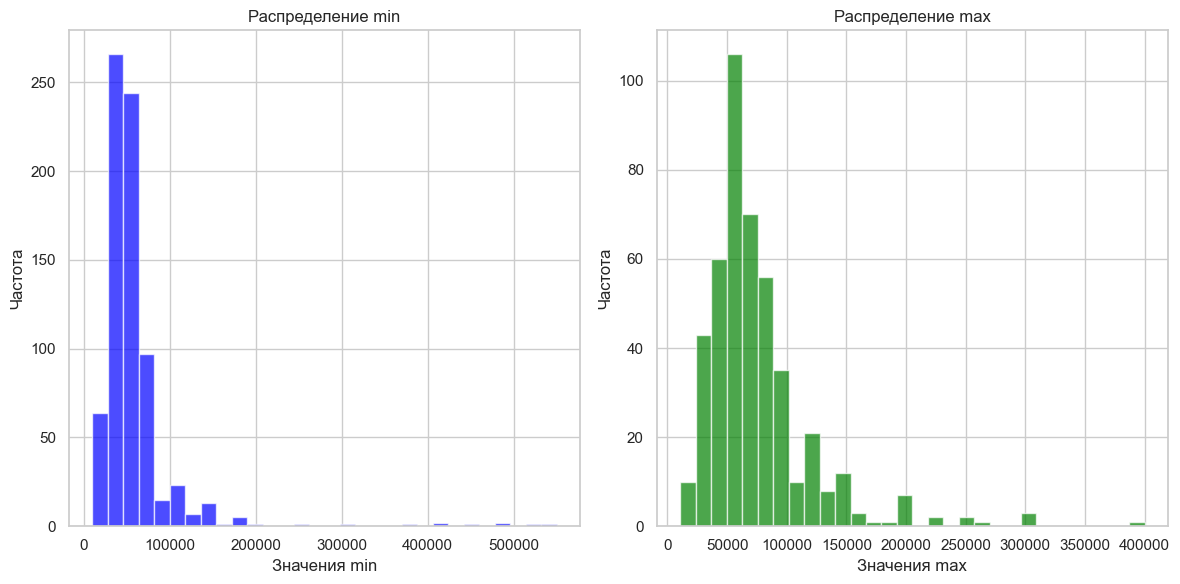

In [60]:
#Визуализация частотности распределения в столбцах min и max
plt.figure(figsize=(12, 6))

# Гистограмма для столбца min
plt.subplot(1, 2, 1)
plt.hist(df_salary['min'], bins=30, color='blue', alpha=0.7)
plt.title('Распределение min')
plt.xlabel('Значения min')
plt.ylabel('Частота')

# Гистограмма для столбца max
plt.subplot(1, 2, 2)
plt.hist(df_salary['max'], bins=30, color='green', alpha=0.7)
plt.title('Распределение max')
plt.xlabel('Значения max')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

На графиках видны выбросы, для анализа возьмем значение меньше 200 000

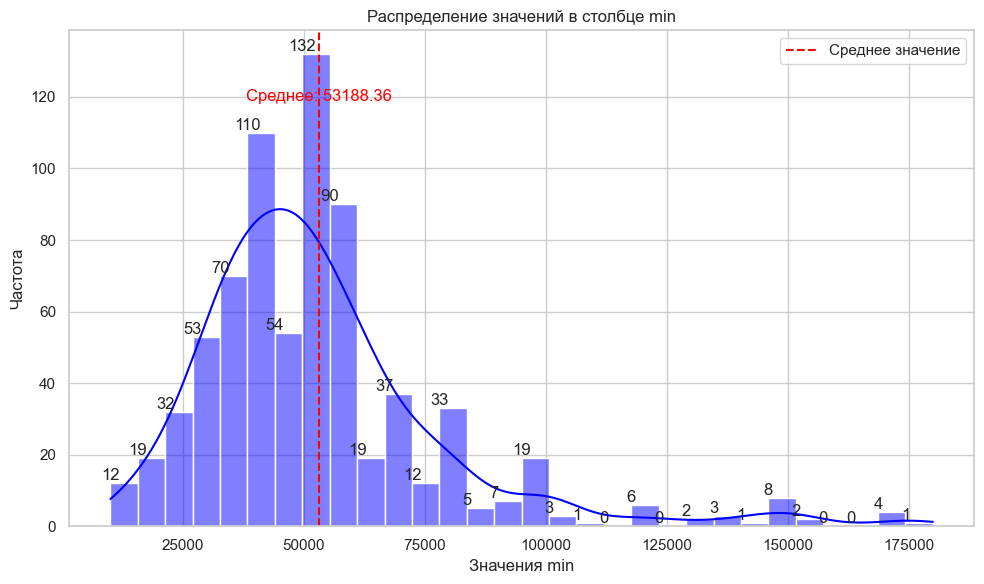

In [61]:
# Фильтрация данных
df_salary_min = df_salary[df_salary['min'] < 200000].dropna(subset=['min'])

# Рассчет среднего значения
mean_min = df_salary_min['min'].mean()

# Настройка графика
plt.figure(figsize=(10, 6))

# Использование seaborn для создания гистограммы
sns.histplot(df_salary_min['min'], bins=30, color='blue', kde=True)

# Настройка заголовка и меток
plt.title('Распределение значений в столбце min')
plt.xlabel('Значения min')
plt.ylabel('Частота')

# Добавление вертикальной линии для среднего значения
plt.axvline(mean_min, color='red', linestyle='--', label='Среднее значение')

# Добавление легенды
plt.legend()

# Добавление значений на график
counts, bins = np.histogram(df_salary_min['min'], bins=30)
for count, x in zip(counts, bins):
    plt.text(x, count, str(count), ha='center', va='bottom')

# Добавление текстового значения среднего на график
plt.text(mean_min, max(counts)*0.9, f'Среднее: {mean_min:.2f}', color='red', ha='center')

plt.tight_layout()
plt.show()

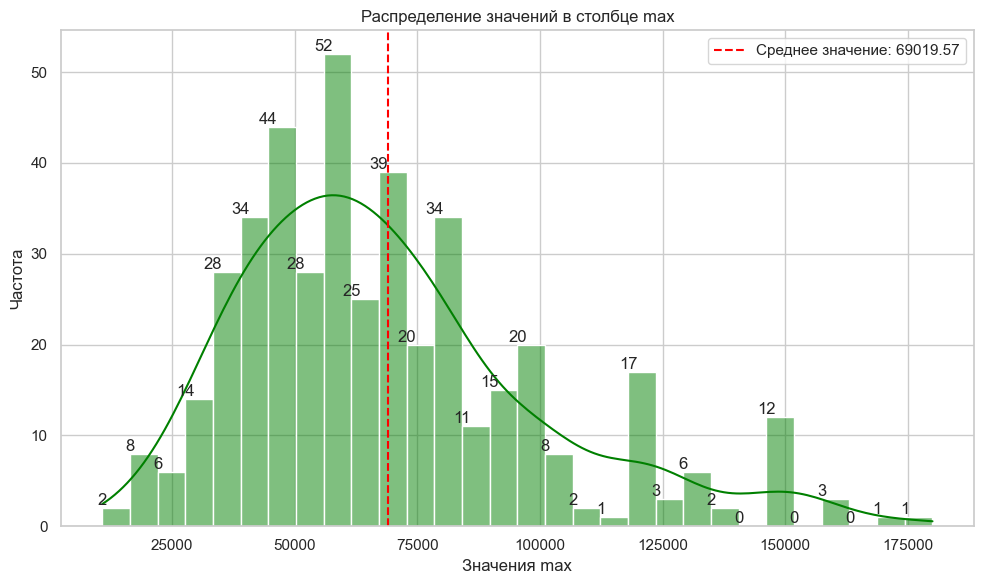

In [62]:
# Фильтрация данных
df_salary_max = df_salary[df_salary['max'] < 200000].dropna(subset=['max'])

# Вычисление среднего значения
mean_value = df_salary_max['max'].mean()

# Настройка графика
plt.figure(figsize=(10, 6))

# Использование seaborn для создания гистограммы
sns.histplot(df_salary_max['max'], bins=30, color='green', kde=True)

# Настройка заголовка и меток
plt.title('Распределение значений в столбце max')
plt.xlabel('Значения max')
plt.ylabel('Частота')

# Добавление вертикальной линии для среднего значения
plt.axvline(mean_value, color='red', linestyle='--', label=f'Среднее значение: {mean_value:.2f}')

# Добавление значений на график
counts, bins = np.histogram(df_salary_max['max'], bins=30)
for count, x in zip(counts, bins):
    plt.text(x, count, str(count), ha='center', va='bottom')

# Добавление легенды
plt.legend()

plt.tight_layout()
plt.show()

### experience - опыт <a id='7'></a>

Проанализируем столбец отдельно

In [63]:
df_experience = pd.DataFrame(df[['link-href', 'experience']])
df_experience

,link-href,experience
0,https://hh.ru/vacancy/103683405,без опыта
1,https://hh.ru/vacancy/103488853,без опыта
2,https://hh.ru/vacancy/103385131,без опыта
3,https://hh.ru/vacancy/101367077,без опыта
4,https://hh.ru/vacancy/103209729,без опыта
...,...,...
1368,https://hh.ru/vacancy/104234975,без опыта
1369,https://hh.ru/vacancy/104205230,без опыта
1370,https://hh.ru/vacancy/104828090,без опыта
1371,https://hh.ru/vacancy/104014458,без опыта


In [64]:
# Подсчет уникальных значений в столбце 'column_name'
unique_count = df_experience['experience'].nunique()

# Вывод результата
print(f'Количество уникальных записей в столбце "experience": {unique_count}')

Количество уникальных записей в столбце "experience": 1


### remote - возможность удаленной работы <a id='8'></a>

Проанализируем столбец отдельно

In [65]:
df_remote = pd.DataFrame(df[['link-href', 'remote']])
df_remote

,link-href,remote
0,https://hh.ru/vacancy/103683405,можно удалённо
1,https://hh.ru/vacancy/103488853,NaN
2,https://hh.ru/vacancy/103385131,можно удалённо
3,https://hh.ru/vacancy/101367077,NaN
4,https://hh.ru/vacancy/103209729,NaN
...,...,...
1368,https://hh.ru/vacancy/104234975,можно удалённо
1369,https://hh.ru/vacancy/104205230,NaN
1370,https://hh.ru/vacancy/104828090,можно удалённо
1371,https://hh.ru/vacancy/104014458,NaN


In [66]:
# Подсчет уникальных значений в столбце 'column_name'
unique_count = df_remote['remote'].nunique()

# Вывод результата
print(f'Количество уникальных записей в столбце "experience": {unique_count}')

Количество уникальных записей в столбце "experience": 1


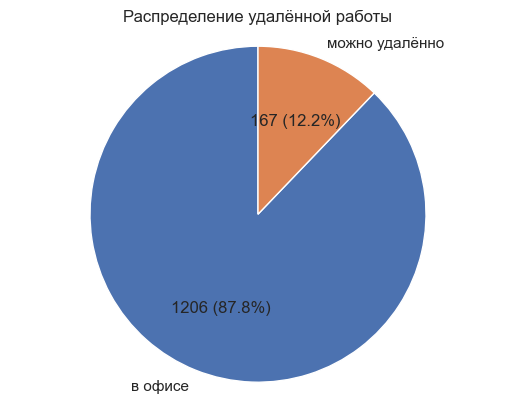

In [67]:
# Заменяем пустые значения на "в офисе"
df_remote['remote'] = df_remote['remote'].fillna('в офисе')

# Подсчет значений
count_values = df_remote['remote'].value_counts()

# Определение меток и значений
labels = count_values.index
sizes = count_values.values

# Создание круговой диаграммы
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes) / 100, p), startangle=90)
ax1.axis('equal')  # Рисуем круг

# Заголовок
plt.title('Распределение удалённой работы')
plt.show()

### place - месторасположение вакансии <a id='9'></a>

Проанализируем столбец отдельно

In [68]:
df_place = pd.DataFrame(df[['link-href', 'place']])
df_place

,link-href,place
0,https://hh.ru/vacancy/103683405,москва
1,https://hh.ru/vacancy/103488853,москва
2,https://hh.ru/vacancy/103385131,ростов-на-дону
3,https://hh.ru/vacancy/101367077,санкт-петербург
4,https://hh.ru/vacancy/103209729,медвежьегорск
...,...,...
1368,https://hh.ru/vacancy/104234975,москва
1369,https://hh.ru/vacancy/104205230,москва
1370,https://hh.ru/vacancy/104828090,красноярск
1371,https://hh.ru/vacancy/104014458,нижний новгород


In [69]:
# Подсчет уникальных значений в столбце 'column_name'
unique_count = df_place['place'].nunique()

# Вывод результата
print(f'Количество уникальных записей в столбце "experience": {unique_count}')

Количество уникальных записей в столбце "experience": 129


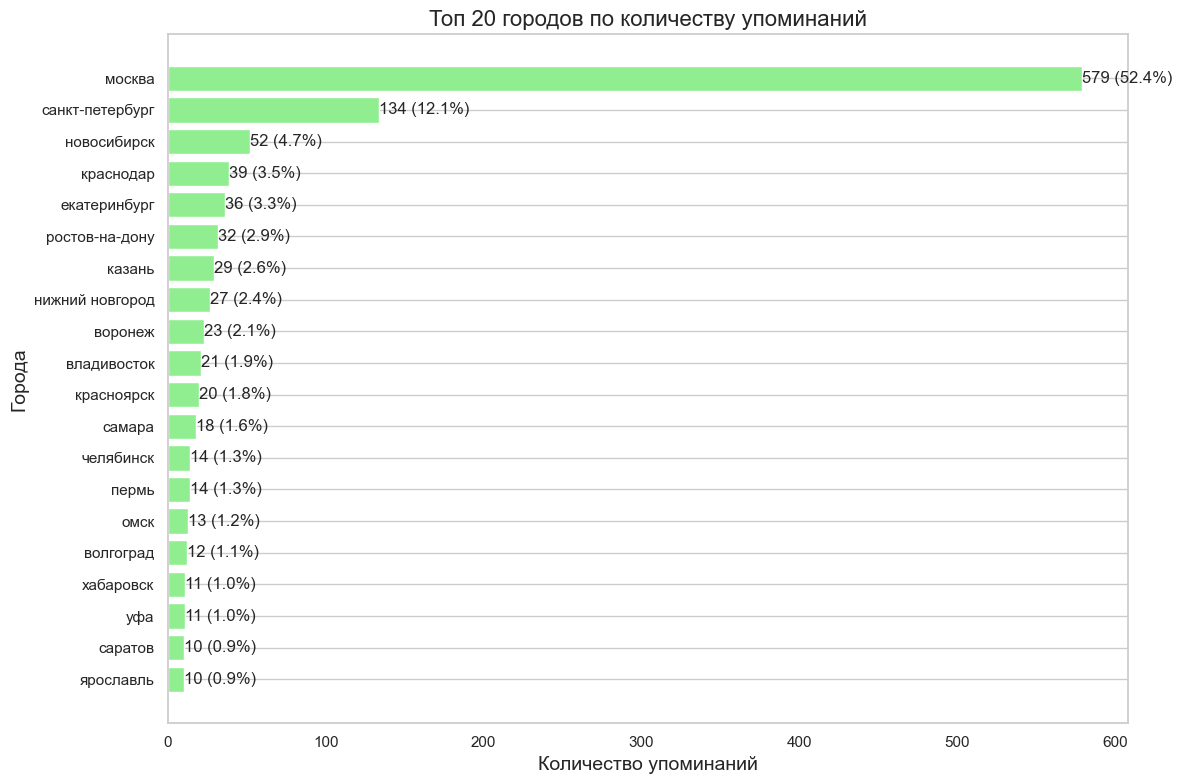

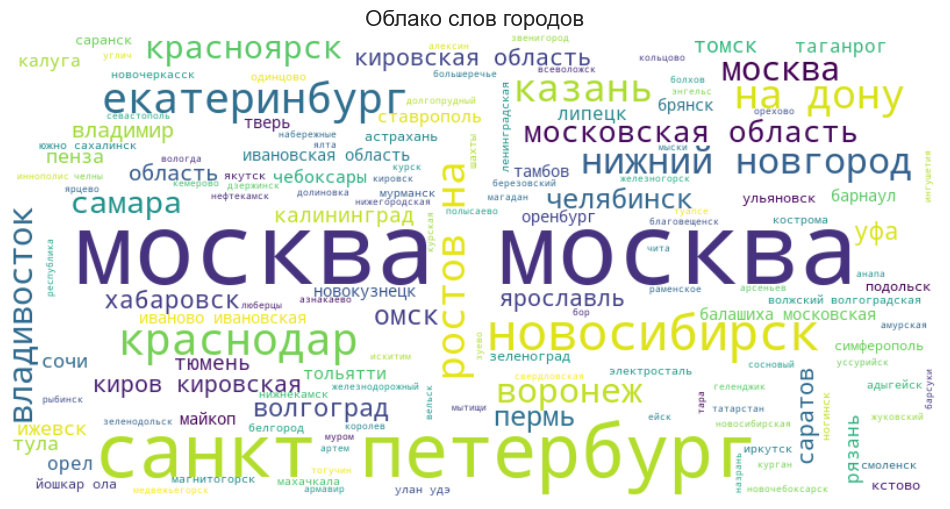

In [70]:
# Подсчет количества упоминаний каждого города и сортировка по убыванию
place_counts = df_place['place'].value_counts().head(20).sort_values()

# Визуализация: Горизонтальная столбчатая диаграмма
plt.figure(figsize=(12, 8))
bars = plt.barh(place_counts.index, place_counts.values, color='lightgreen')  # Изменен цвет на светло-зеленый

# Добавляем подписи значений на столбцы (абсолютные и относительные)
total_mentions = place_counts.sum()
for bar in bars:
    xval = bar.get_width()
    relative_val = (xval / total_mentions) * 100  # Вычисляем относительное значение
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{int(xval)} ({relative_val:.1f}%)', va='center', ha='left')

plt.title('Топ 20 городов по количеству упоминаний', fontsize=16)
plt.xlabel('Количество упоминаний', fontsize=14)
plt.ylabel('Города', fontsize=14)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Визуализация: Облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_place['place']))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.title('Облако слов городов', fontsize=16)
plt.show()

### Работодатели по заработной плате <a id='10'></a>

Проанализируем столбец отдельно

In [71]:
# Объединение датафреймов по столбцам 'link-href' и 'salary'
merged_df = pd.merge(df, df_salary, on=['link-href', 'salary'], how='left')

# Упорядочивание столбцов в нужном порядке
final_columns = ['vacancy', 'employer', 'salary', 'min', 'max', 'experience', 'remote', 'place', 'link-href']
merged_df = merged_df[final_columns]

# Вывод финального датафрейма
merged_df

,vacancy,employer,salary,min,max,experience,remote,place,link-href
0,менеджер проектов в сфере медиааналитики,яндекс крауд: контент,от 65 000 ₽ на руки,65000.0,NaN,без опыта,можно удалённо,москва,https://hh.ru/vacancy/103683405
1,специалист/координатор по поддержке бизнеса,ао лакталис восток,NaN,NaN,NaN,без опыта,NaN,москва,https://hh.ru/vacancy/103488853
2,начинающий специалист в it / аналитик битрикс24,invo group,30 000 – 90 000 ₽ до вычета налогов,26100.0,78300.0,без опыта,можно удалённо,ростов-на-дону,https://hh.ru/vacancy/103385131
3,аналитик/рекрутер/ресечер,ancor,NaN,NaN,NaN,без опыта,NaN,санкт-петербург,https://hh.ru/vacancy/101367077
4,торговый представитель,пао «мтс»,от 84 000 ₽ до вычета налогов,73080.0,NaN,без опыта,NaN,медвежьегорск,https://hh.ru/vacancy/103209729
...,...,...,...,...,...,...,...,...,...
1368,продуктовый аналитик (remote),startribe ltd,NaN,NaN,NaN,без опыта,можно удалённо,москва,https://hh.ru/vacancy/104234975
1369,аналитик в департамент мониторинга,ооо алмаз,90 000 – 110 000 ₽ на руки,90000.0,110000.0,без опыта,NaN,москва,https://hh.ru/vacancy/104205230
1370,аналитик,ооо континент,до 46 000 ₽ до вычета налогов,NaN,40020.0,без опыта,можно удалённо,красноярск,https://hh.ru/vacancy/104828090
1371,аналитик по обращаемости,билайн,NaN,NaN,NaN,без опыта,NaN,нижний новгород,https://hh.ru/vacancy/104014458


#Указываем имя файла, включая полный путь
filename = r'C:\Users\ANDREI\Downloads\merged_df.xlsx' # Измените это на свой путь

#Скачиваем DataFrame в формате Excel
merged_df.to_excel(filename, index=False)

print(f'Файл "{filename}" успешно сохранен.')

In [72]:
# Группировка данных по столбцу 'employer' и вычисление средних значений по столбцам 'min' и 'max'
grouped_df = merged_df.groupby('employer').agg(
    min_average=('min', 'mean'),
    max_average=('max', 'mean')
).reset_index()

# Вывод результата
grouped_df

,employer,min_average,max_average
0,#izum,30000.0,60000.0
1,101hotels.com,174000.0,NaN
2,2гис,33000.0,NaN
3,abbott laboratories,NaN,NaN
4,abi,NaN,NaN
...,...,...,...
908,ямми минимаркет,60000.0,NaN
909,яндекс,NaN,56550.0
910,яндекс команда для бизнеса,47415.0,34561.0
911,яндекс крауд: контент,65000.0,NaN


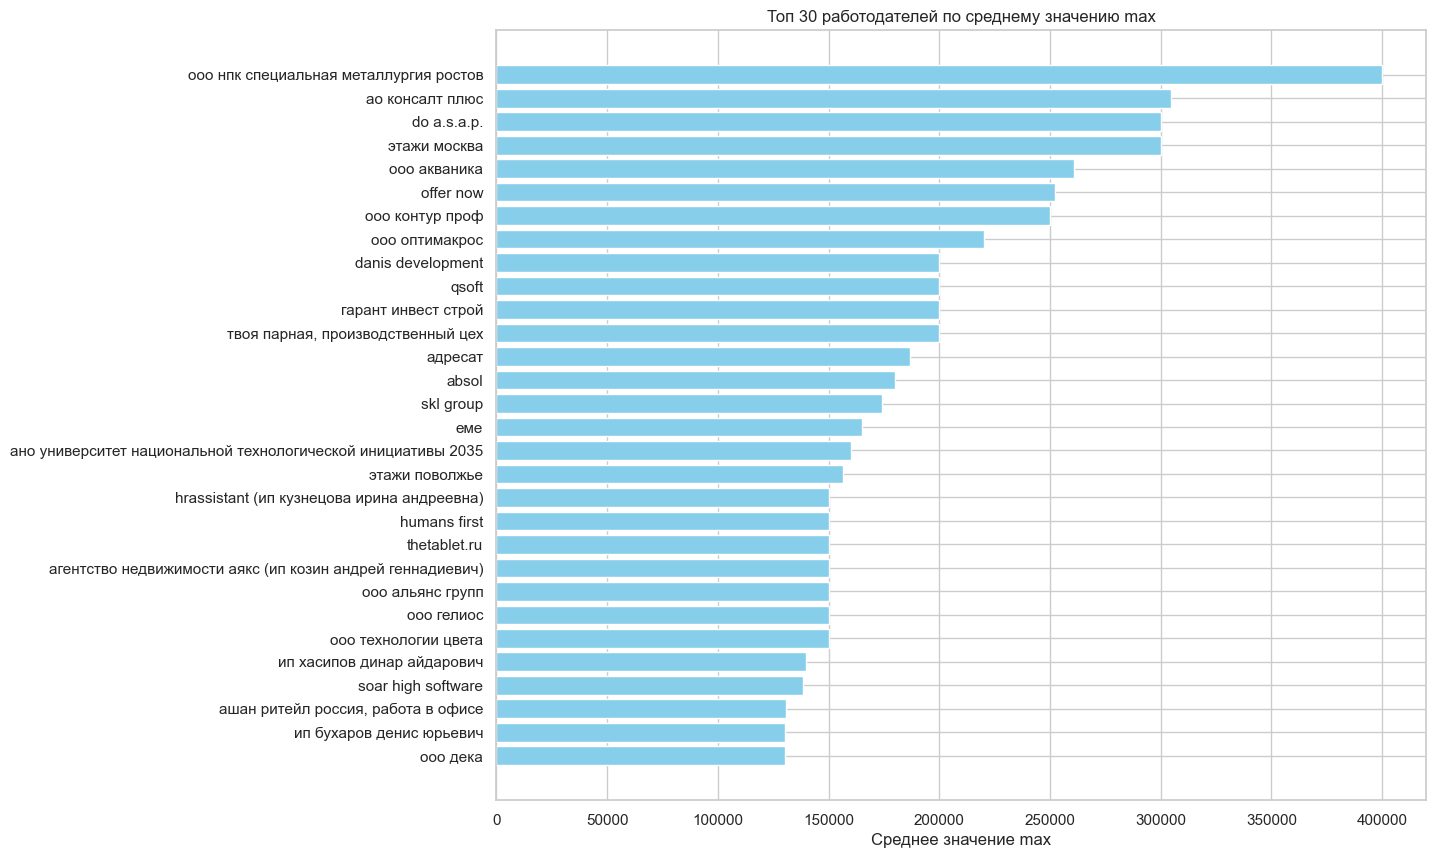

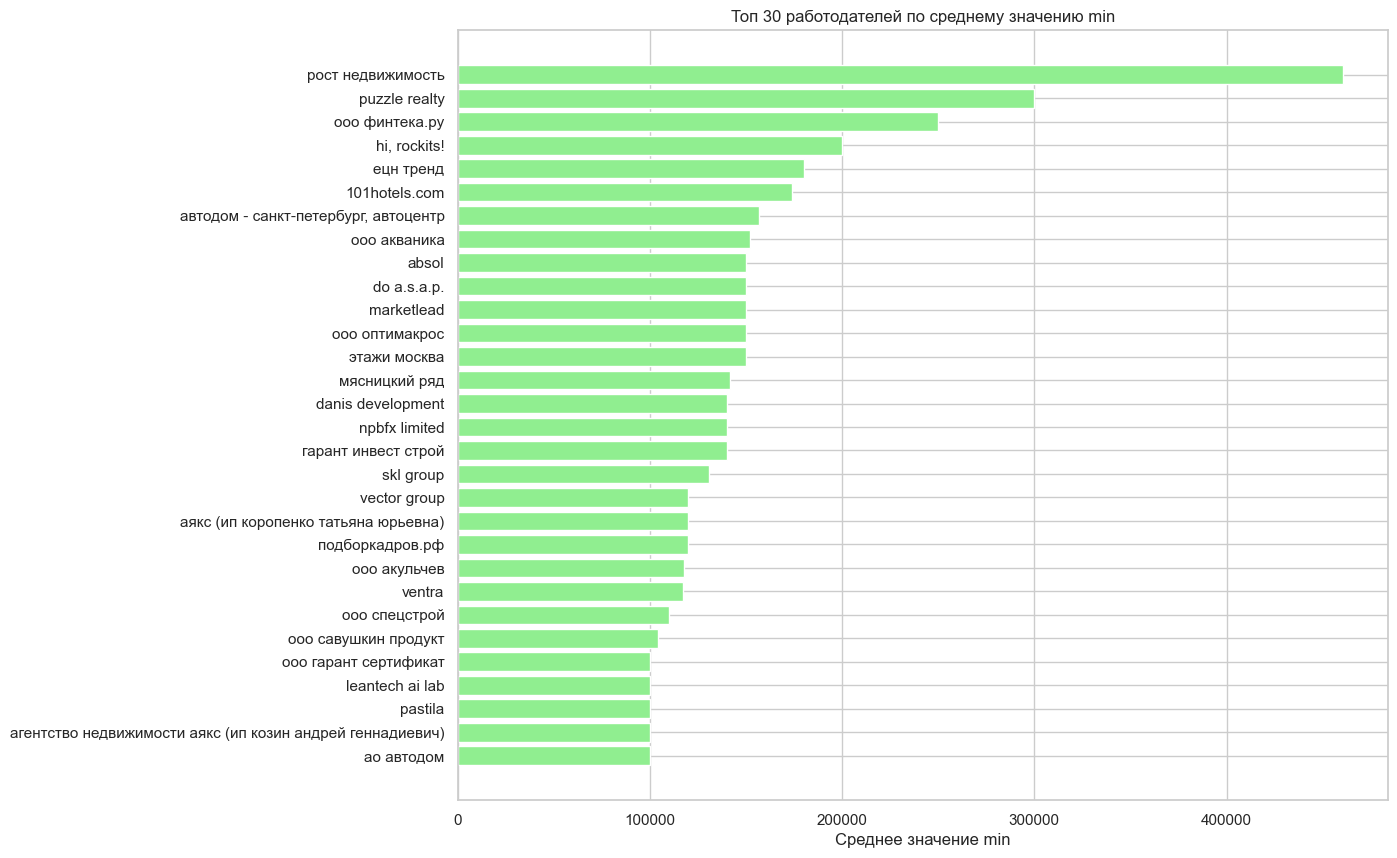

In [73]:
# Сортируем данные по max_average и min_average и выбираем топ-30
top_30_max = grouped_df.nlargest(30, 'max_average')
top_30_min = grouped_df.nlargest(30, 'min_average')

# Создание графика для max_average
plt.figure(figsize=(12, 10))
plt.barh(top_30_max['employer'], top_30_max['max_average'], color='skyblue')
plt.xlabel('Среднее значение max')
plt.title('Топ 30 работодателей по среднему значению max')
plt.gca().invert_yaxis()  # Инвертируем ось Y для удобства
plt.show()

# Создание графика для min_average
plt.figure(figsize=(12, 10))
plt.barh(top_30_min['employer'], top_30_min['min_average'], color='lightgreen')
plt.xlabel('Среднее значение min')
plt.title('Топ 30 работодателей по среднему значению min')
plt.gca().invert_yaxis()  # Инвертируем ось Y для удобства
plt.show()